In [1]:
#Chapter 6 비지도 학습
#🍰06-1. 군집 알고리즘

#과일 사진 데이터 준비하기
#--흑백사진, 넘파이 배열의 기본 저장 포맷 npy 파일

!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-12-09 23:06:57--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-12-09 23:06:57--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-12-09 23:06:58--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... c

In [2]:
# 데이터 로드
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')
print(fruits.shape)
#(샘플갯수,이미지높이,이미지너비)

(300, 100, 100)


In [3]:
#첫번째 이미지 첫번째 행 출력
#이미지는 3차원 배열
#--처음 2개의 인덱스를 0으로, 마지막 인덱스는 지정하지 않거나 슬라이싱 연산자
print(fruits[0,0,:])


#첫 번째 행에 있는 픽셀 100개 출력

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


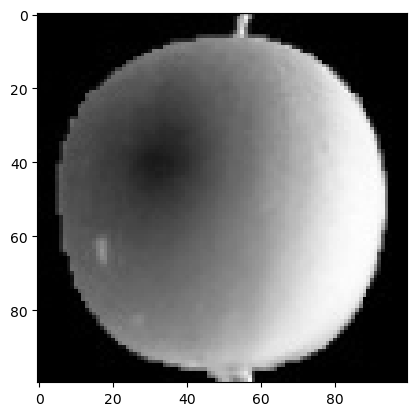

In [4]:
#넘파일 배열로 저장된 이미지 그리기

plt.imshow(fruits[0], cmap='gray')
plt.show()


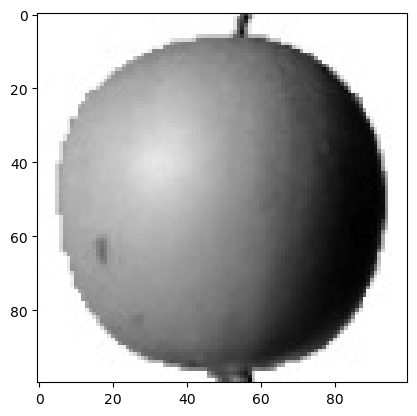

In [5]:
plt.imshow(fruits[0],cmap='gray_r')
plt.show()

#밝은 부부이 0에 가깝고 짙은 부분이 255에 가까운 값!!!

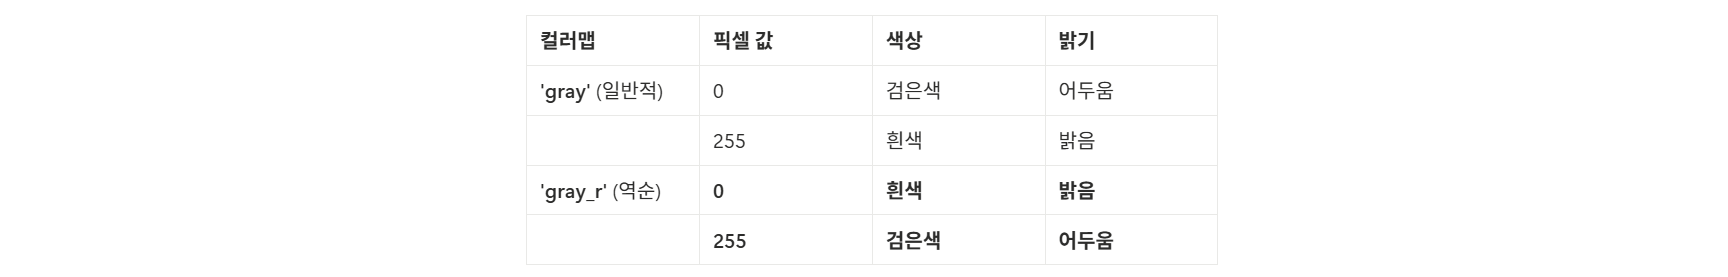

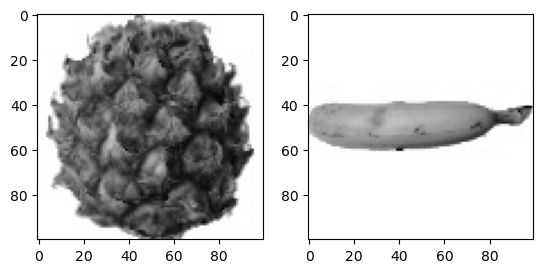

In [6]:
#바나나,파인애플 이미지
#--subplots: 여러 개의 그래프를 배열처럼 쌓을 수 있다.두 매개변수는 행과 열을 지정

fig,axs = plt.subplots(1,2) #1개의 행과 2개의 열을 지정
axs[0].imshow(fruits[100], cmap='gray_r') #axs[0]에는 파인애플 이미지
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

In [7]:
#🍰픽셀값 분석하기
#--넘파이 배열을 나눌 때 100*100이미지(2차원)를 평처 길이가 10,000인 1차원 배열로 만든다

#순서대로 100개씩 선택(슬라이싱 연산자 사용)
#reshape메서드로 두 번째 차원과 세 번째 차원을 합침
#첫 번째 차원을 -1로 지정하면 자동으로 남은 차원을 할당
#여기서 첫번째 차원은 샘플 갯수 


apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

##이제 각 과일 배열의 크기는 (100,10000)
print(pineapple.shape)


(100, 10000)


In [8]:
#각 과일 샘플의 픽셀 평균값 계산
#픽셀의 평균값 계산할 축을 지정
# axis = 0으로 하면 첫 번째 축인 행을 따라 계산
# axis = 1로 지정하면 두 번째 축인 열을 따라 계산

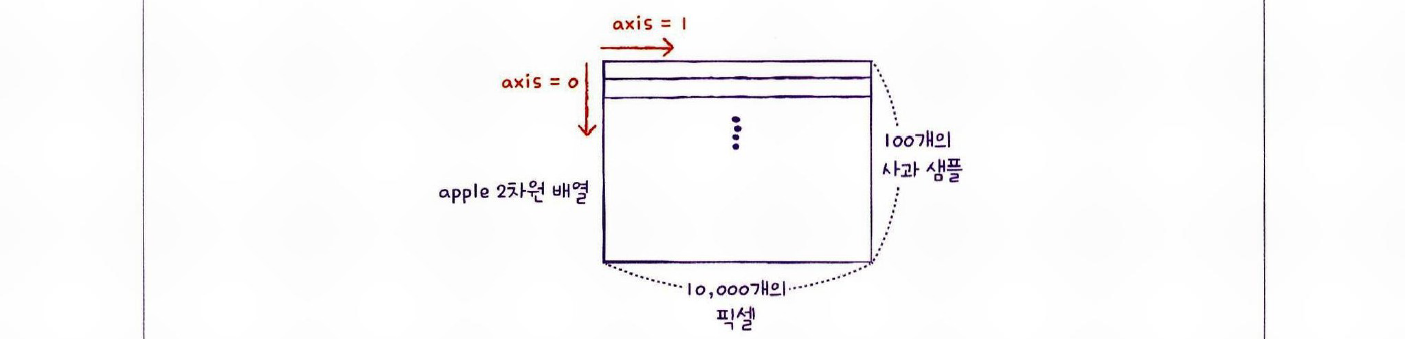

In [9]:
#🍎100개의 사과 샘플이 '세로로 축적'되어 있는 것(행 방향)은 맞지만, 
#🍎각 샘플의 구성 요소(픽셀 값) 자체는 가로(열 방향)로 나열되어 있기 때문에 '가로로 나열되어 있다

#즉, 샘플의 값은 가로로 나열되어 있으니 axis = 1로 지정!
print(apple.mean(axis=1))

#아래는 사과 샘플 100개 픽셀 평균값들.

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


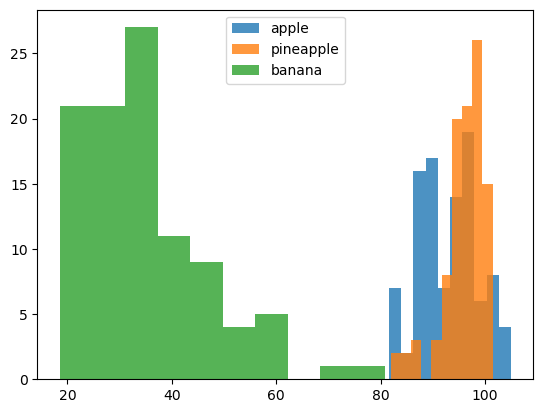

In [10]:
#히스토그램을 그려 평균값 한눈에 보기

plt.hist(apple.mean(axis=1), alpha=0.8, label='apple')
plt.hist(pineapple.mean(axis=1), alpha=0.8, label='pineapple')
plt.hist(banana.mean(axis=1), alpha=0.8, label='banana')

plt.legend()
plt.show()

In [11]:
#위에서
#바나나는 사진에서 차지하는 영역이 작아 평균값이 작고 사과와 파인애플은 많이 겹쳐짐
#사과 및 파인애플은 대체로 비슷해서

In [12]:
print("apple shape:", apple.shape)
print("pineapple shape:", pineapple.shape)
print("banana shape:", banana.shape)

print("apple mean range:", apple.mean(axis=1).min(), apple.mean(axis=1).max())
print("pineapple mean range:", pineapple.mean(axis=1).min(), pineapple.mean(axis=1).max())
print("banana mean range:", banana.mean(axis=1).min(), banana.mean(axis=1).max())


apple shape: (100, 10000)
pineapple shape: (100, 10000)
banana shape: (100, 10000)
apple mean range: 81.6226 104.9854
pineapple mean range: 81.9464 101.4657
banana mean range: 18.568 80.8545


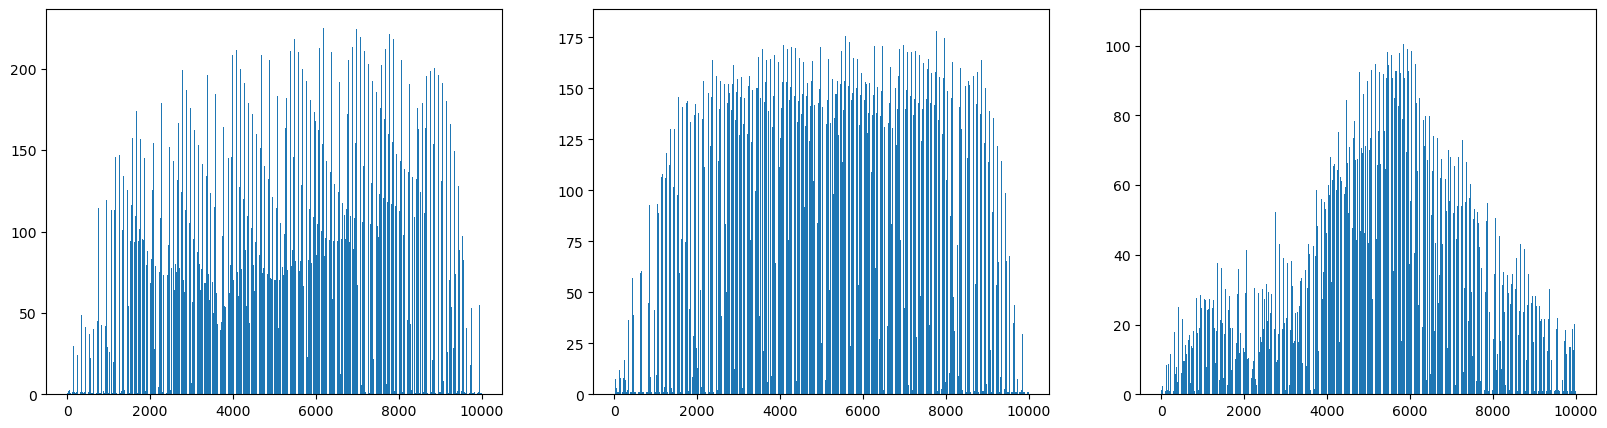

In [13]:
#샘플의 평균값이 아닌 '픽셀의 평균값'을 비교!!
#전체 샘플의 각 픽셀의 평균을 계산
#‼️픽셀의 평균은 axis = 0 으로 지정

fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), apple.mean(axis=0)) 
axs[1].bar(range(10000), pineapple.mean(axis=0))
axs[2].bar(range(10000), banana.mean(axis=0))
plt.show()

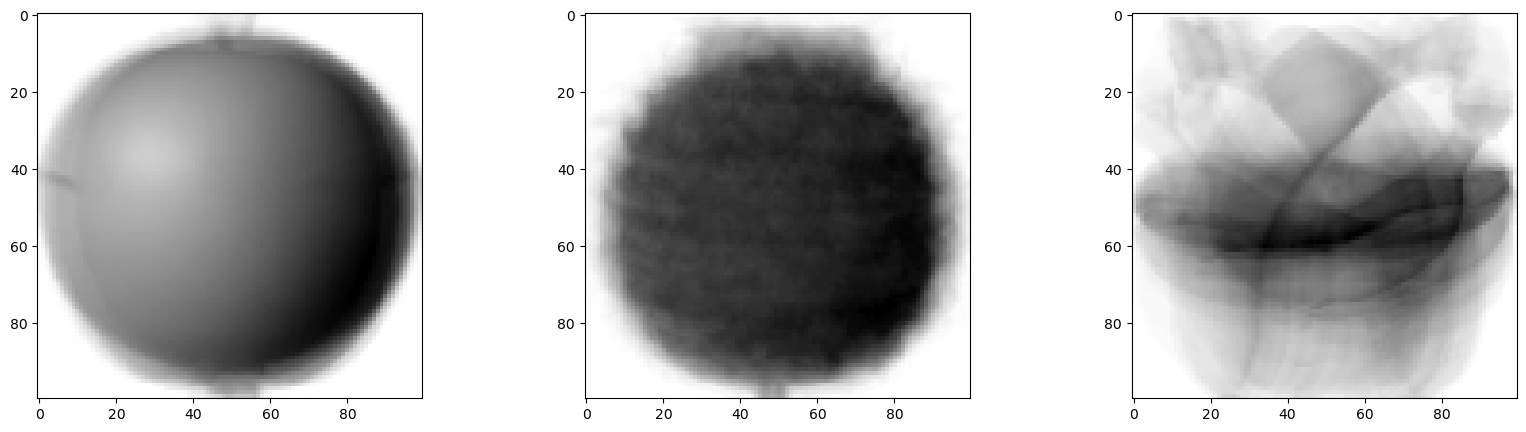

In [14]:
# 픽셀 평균값을 100x100 크기로 바꿔서 이미지처럼 출력
apple_mean = apple.mean(axis=0).reshape(100, 100)
pineapple_mean = pineapple.mean(axis=0).reshape(100, 100)
banana_mean = banana.mean(axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

#세 과일은 픽셀 위치에 따라 값의 크기가 차이남

In [15]:
import numpy as np

In [16]:
#🍰평균값과 가까운 사진 고르기 p13
#절댓값 오차를 사용

#abs : 절댓값 계산

abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis =(1,2)) 
#각 샘플에 대한 평균을 구하기 위해 axis에 두,세번째 차원 지정
#🍎이 abs_mean은 각 샘플의 오차 평균이라 크기가 (300,)인 1차원 배열
print(abs_mean.shape)




(300,)


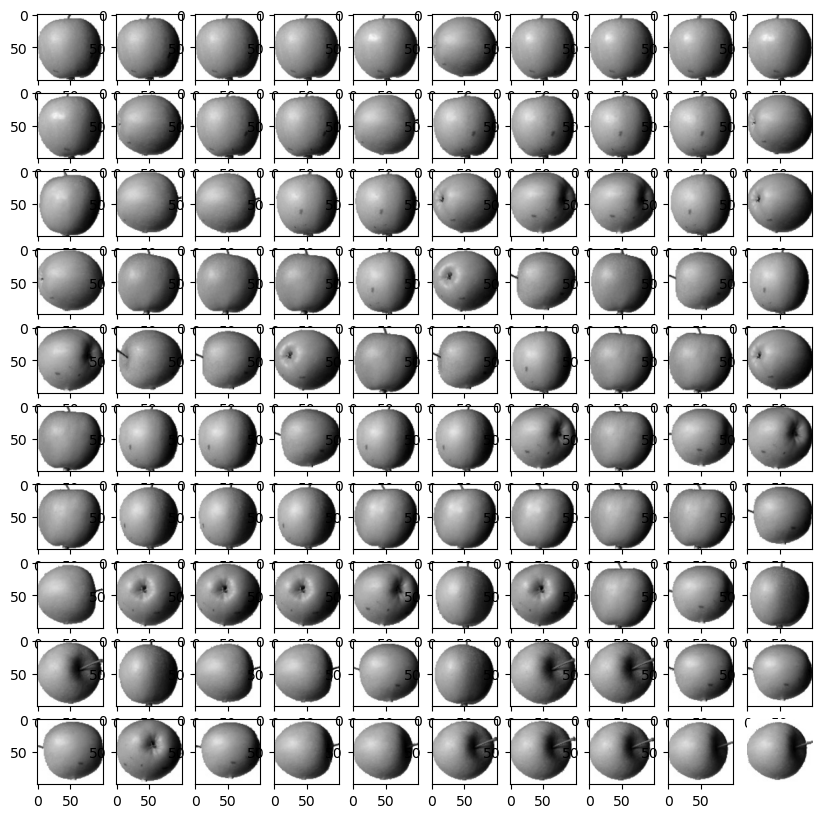

In [17]:
# p14
#🍎apple_mean과 오차가 가장 작은 샘플 100개
# np.argsort : 작은 것에서 큰 순서대로 나열한 abs_mean 배열 인덱스 반환

#처음 100개를 선택해 10x10 격자로 이루어진 그래프 작성

apple_index = np.argsort(abs_mean)[:100]
apple_index = apple_index.reshape(10, 10)
fig, axs = plt.subplots(10, 10, figsize=(10,10)) #기본값은 figsize(8,6)
#subplots함수로10x10 총 100개 서브 그래프
#그래프가 많아서 사이즈를 figsize(10,10)으로 크게 지정

#이중 for반복문을 순회하면서 10개의 행과 열 이미지 출력
#axs (10,10) 2차원이라 i,j 두 첨자 사용
#이미지만 표현 -> axis('off') = 좌표축X
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i, j]], cmap='gray_r')
axs[i, j].axis('off')
# axs[i, j].axis('om')
plt.show()

(300,)


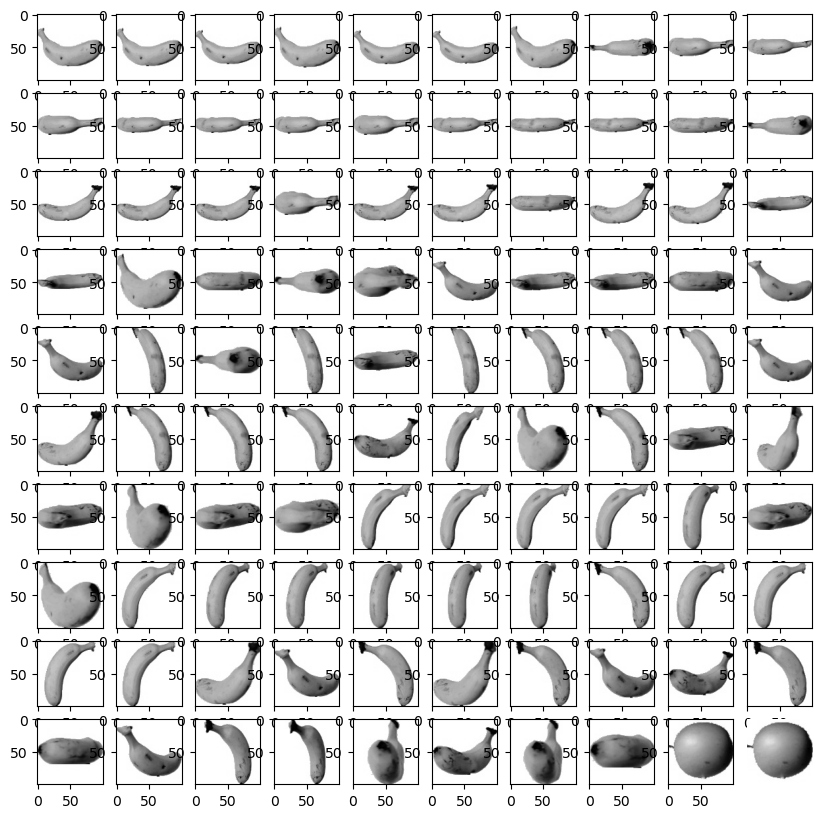

In [18]:
#🍌
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis =(1,2)) 
print(abs_mean.shape)


banana_index = np.argsort(abs_mean)[:100]
banana_index = banana_index.reshape(10, 10)
fig, axs = plt.subplots(10, 10, figsize=(10,10))

for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i, j]], cmap='gray_r')
axs[i, j].axis('off')
plt.show()

✨대표적인 비지도 학습 문제 '군집'

✨군집 clustering : 비슷한 샘플끼리 그룹을 모음       
✨클러스터 cluster : 군집 알고리즘에서 만든 그룹      
✨타깃값을 알고 있고 평균값을 계산해 가장 가까운 과일 찾았음        

-비지로 학습: 머신러닝의 한 종류, 훈련 데이터에 타깃 X (군집, 차원 축소 등)     
-히스토그램: 구간별로 발생한 빈도 표시(x축:구간, y축:빈도)      


##### 06-2 k-평균(k-means) :평균값을 자동으로 찾아줌   
✨타깃이 없는 사진을 사용하여 샘플 그룹의 평균값 찾기          
k-평균에 의해 얻은 평균값이 클러스터의 중심에 위치해서 '클러스터 중심' or '센트로이드'라고 부름     

✨k — 평균 알고리즘       
1 무작위로 k개의 클러스터 중심을 정함       
2 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정      
3 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경        
4 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복        

In [19]:
#🧁Kmeans 클래스
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-12-09 23:07:36--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-12-09 23:07:36--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-12-09 23:07:36--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... c

In [20]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100) 
#--kmeans평균 모델을 훈련하기 위 3차원 배열(샘플개수,너비,높이)->(샘플개수,너비*높이) 2차원 배열로 변경


In [21]:
# 사이킷런 kmean알고리즘
from sklearn.cluster import KMeans

# 클러스터 개수 : 매개변수
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d) #‼️비지도학습이기때문에 fit()메서드에서 타킷 데이터 사용X

KMeans(n_clusters=3, random_state=42)

In [22]:
# 위에서 군집된 결과는 KMeans 클래스 labels_ 속성에 저장
# labels_ 배열의 길이는 샘플 개수와 같음
# n_clusters=3으로 지정해서 labels_배열 값은 0,1,2 중 하나

print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [23]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


In [24]:
#🧁클러스터 이미지화 draw_fruits

import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots (rows, cols,
                             figsize=(cols*ratio, rows*ratio),squeeze=False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n :
                axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

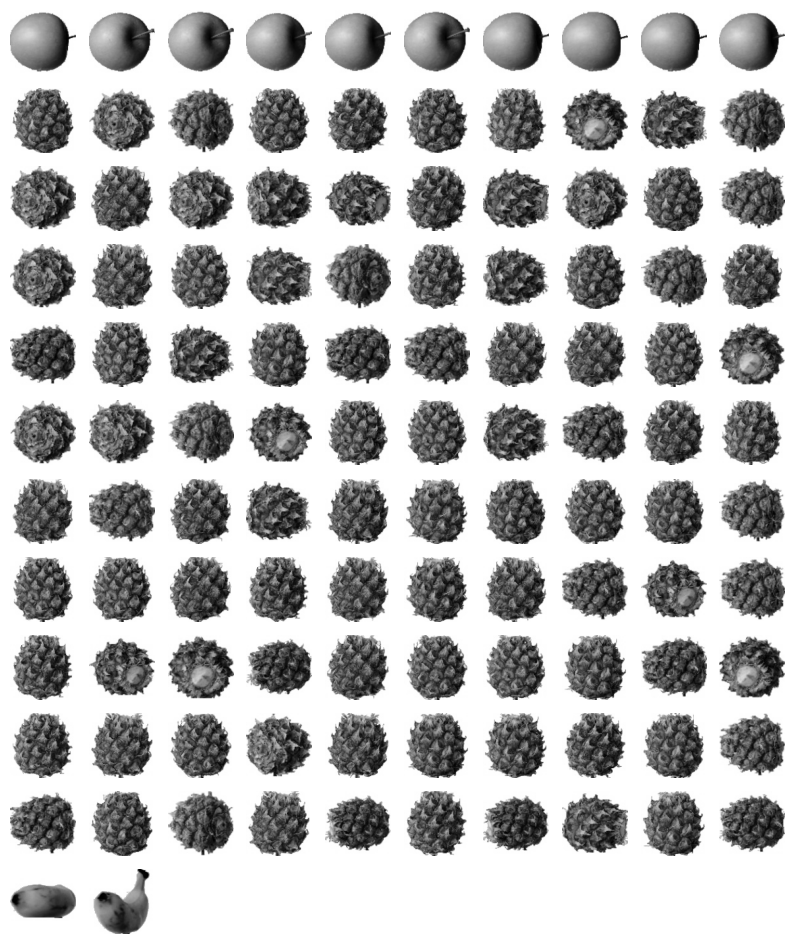

In [25]:
draw_fruits(fruits[km.labels_==0])

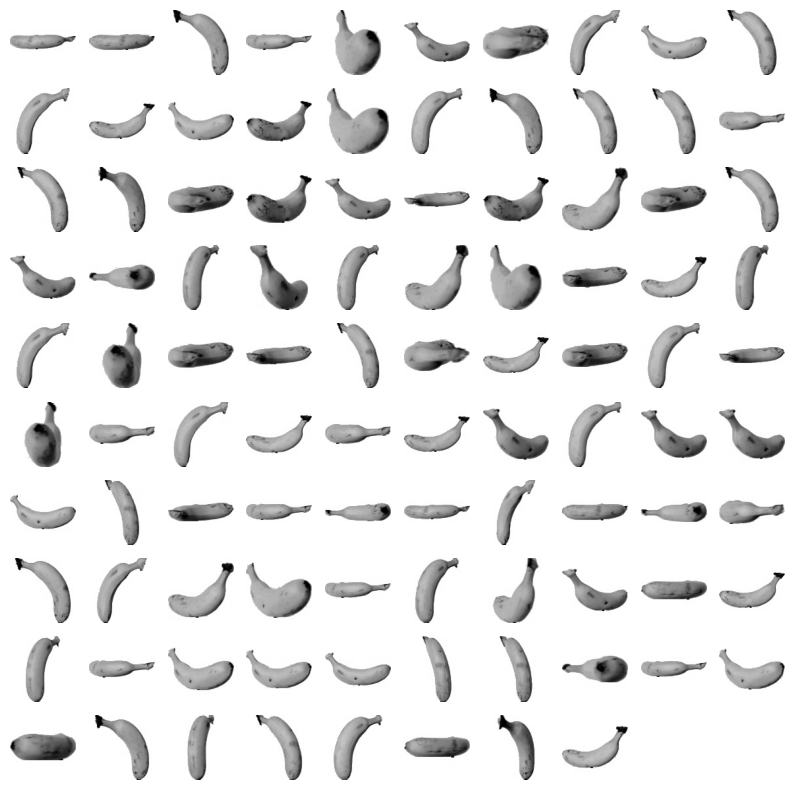

In [26]:
draw_fruits(fruits[km.labels_==1])

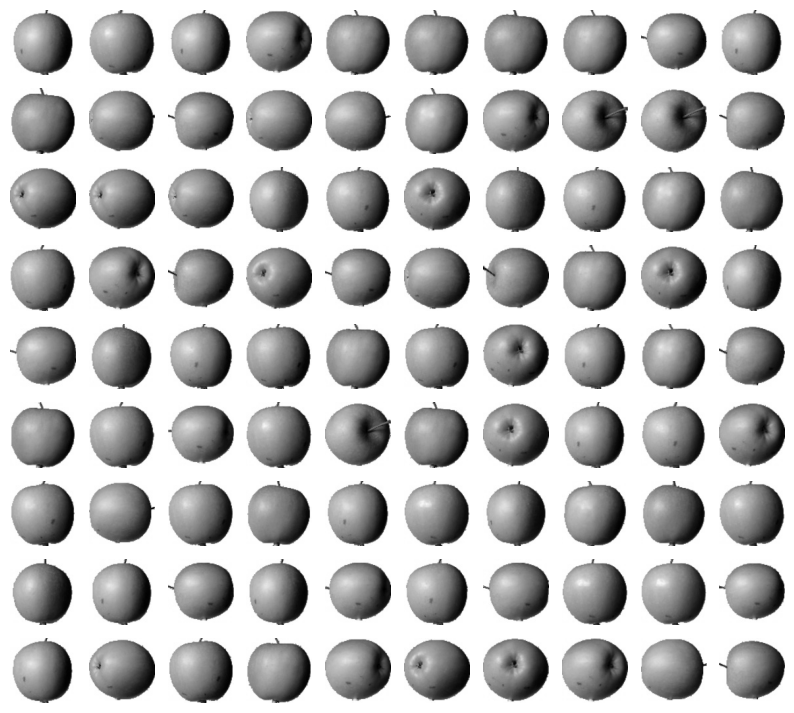

In [27]:
draw_fruits(fruits[km.labels_==2])

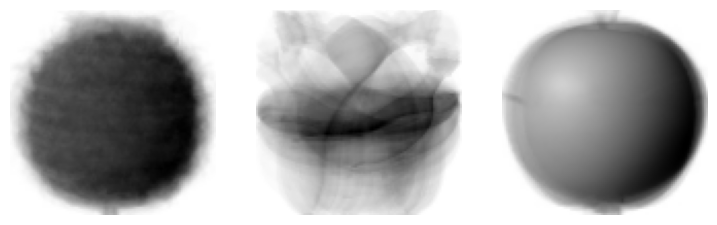

In [28]:
#🧁KMeans 클래스가 최종적으로 찾은 클러스터 중심은 cluster_centers_속성에 저장
#fruits_2d 2차원배열로

draw_fruits(km.cluster_centers_.reshape(-1,100,100), ratio=3)

In [29]:
#🧁샘플에서 클러스터 중심까지 거리 변환 transform

print(km.transform(fruits_2d[100:101]))

[[3400.24197319 8837.37750892 5279.33763699]]


In [30]:
#가장 가까운 클러스터 중심 예측

print(km.predict(fruits_2d[100:101]))

[0]


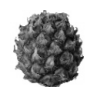

In [31]:
#예측한 레이블 확인
draw_fruits(fruits[100:101])

In [32]:
#알고리즘이 반복한 횟수 확인
print(km.n_iter_)

4


In [33]:
#🧁p28 최적의 k 찾기
## 엘보우 방법 : 적절한 클러스터 개수 

#--클러스터 개수가 늘어나면 클러스터 개개의 크기가 줄어들어 이너셔도 줄어듬
#--엘보우방법은 클러스터 개수를 늘려가며 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법

#--클러스터 개수 증가, 이너셔의 감소하는 속도가 꺽이는 지점이 있는데 팔꿈치 모양이어서!

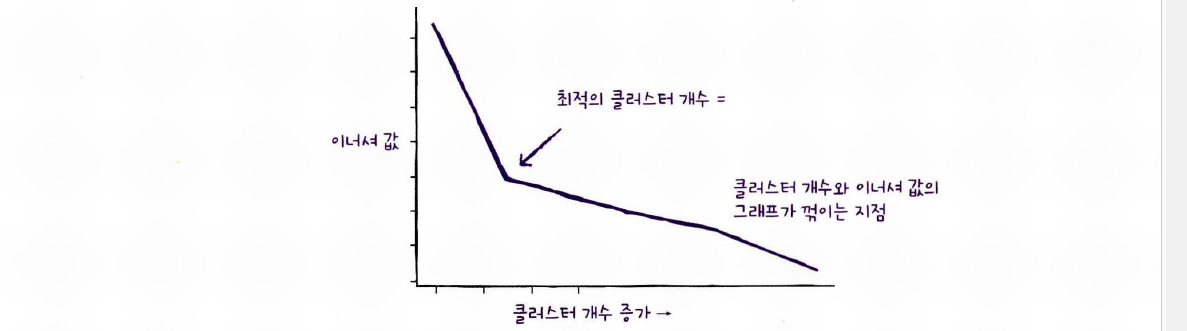

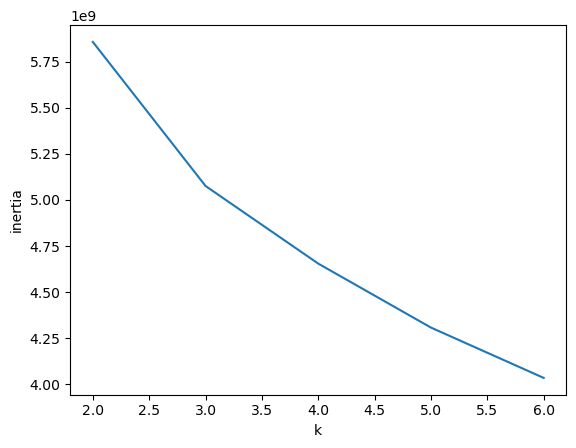

In [34]:
#클러스터 2~6까지 바꿔가며 KMeans 클래서 5번 훈련

inertia = []
for k in range(2,7):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

마무리      

k-평균 알고리즘      
#1. KMeans 클래스,각 샘플이 어떤 클러스터에 소속되어 있는지 lables_속성에 저장      
#2. KMeans 클래스,각 샘플에서 각 클러스터까지의 거리, transform() 메서드        
#3. predic() 메서드; 새로운 샘플에 대해 가장 가까운 클러스터 예측값 출력        

#4.이너셔: 클러스터 중심과 샘플 사이 거리의 제곱 합     


In [35]:
#🍰06-3.주성분 분석 principal component analysis
#--군집 및 분류에 영향 없이 업로드된 사진의 용량 줄이기---------------차원축소-----------

#✨차원dimension :데이터가 가진 특성 ex)10,000개의 픽셀은 10,000개의 특성 만개의 차원


주성분은 원본 차원과 같고, 주성분으로 바꾼 데이터는 차원이 줄어든다!!!!!!     
        
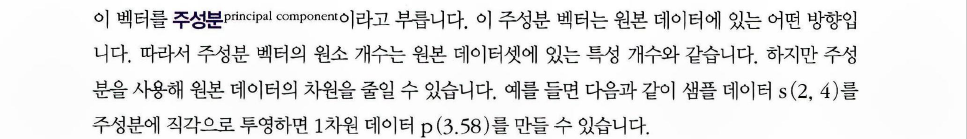  
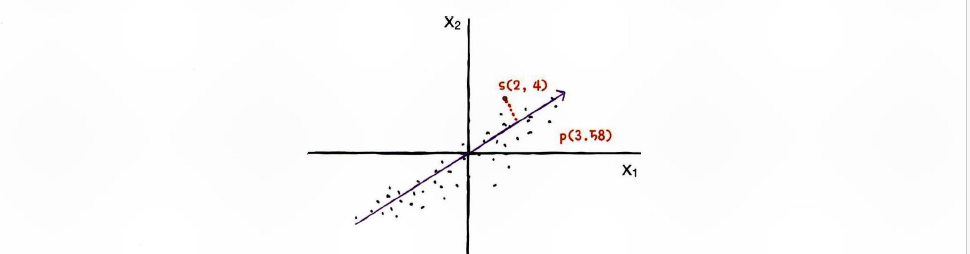      
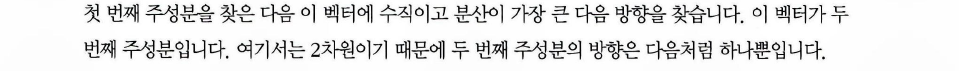
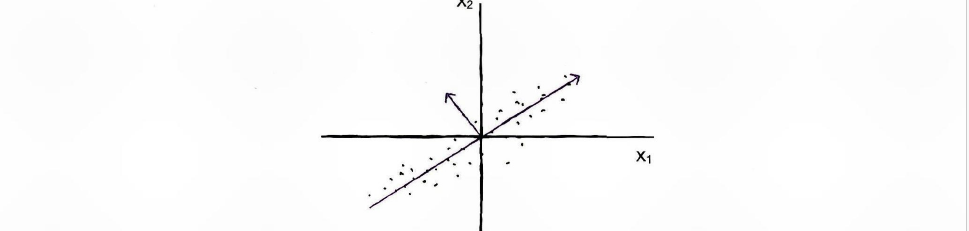

In [36]:
#🧁PCA 클래스

!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-12-09 23:07:45--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-12-09 23:07:45--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-12-09 23:07:45--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... c

In [37]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [39]:
#PCA클래스가 찾은 주성분은 components_속성에 저장

print(pca.components_.shape)
# 50으로 지정했기 땜에 첫번째 차원이 50이 됨---- 50개의 주성분
# 두번째 차원은 원본 데이터와 같은 10,000개


(50, 10000)


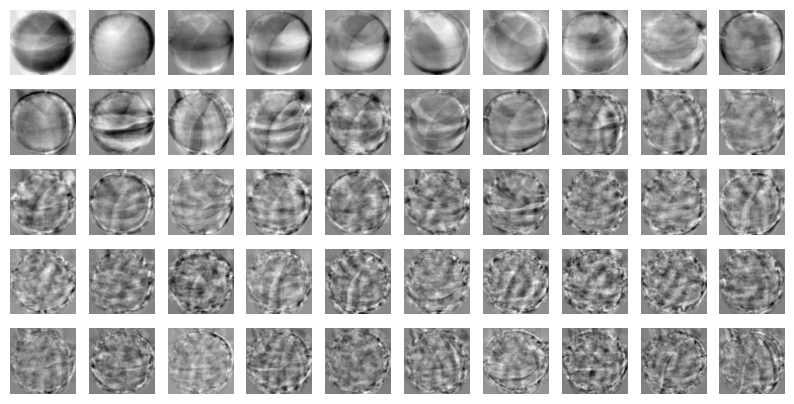

In [40]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

#‼️원본데이터에서 가장 분산이 큰 방향을 순서대로 나열

In [41]:
print(fruits_2d.shape)

#🍎🍌🍍fruits_2d는 10,000개의 픽셀(특성)을 가진 300개의 이미지


(300, 10000)


In [42]:
#원본데이터의 차원 50으로 줄이기 -- PCA의 transform 메서드 사용
#🖐️ fruits_pca 배열은 50개의 특성을 가진 데이터

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [43]:
#🍎🍌🍍 원본 데이터 재구성 p41
#--1만개를 50개로 줄여 어느정도 손실 발생했지만 원본 상당 재구성 가능
#--🧁inverse_transform() 메서드 제공

fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


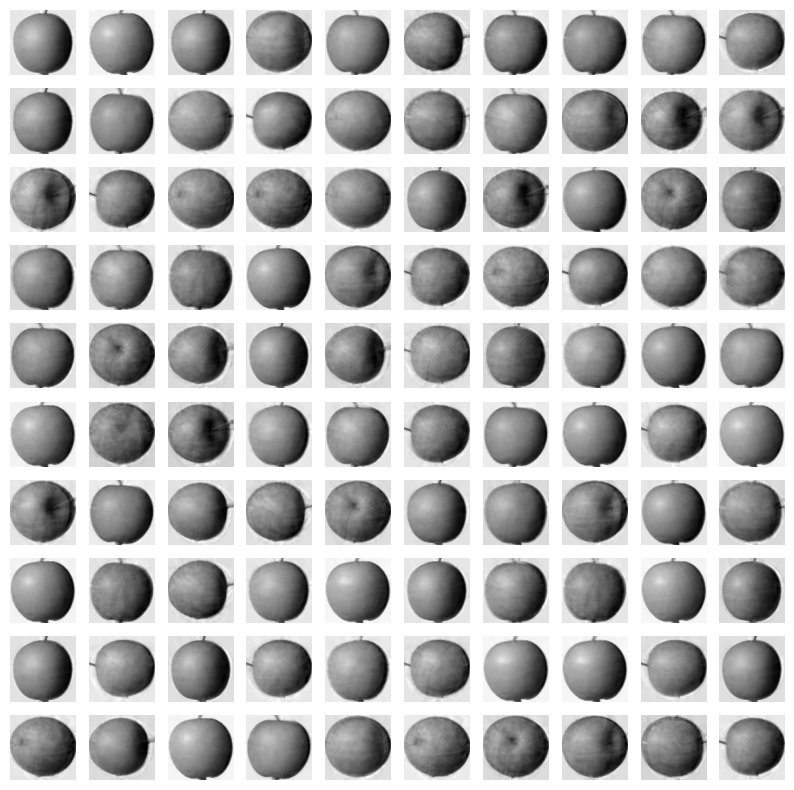

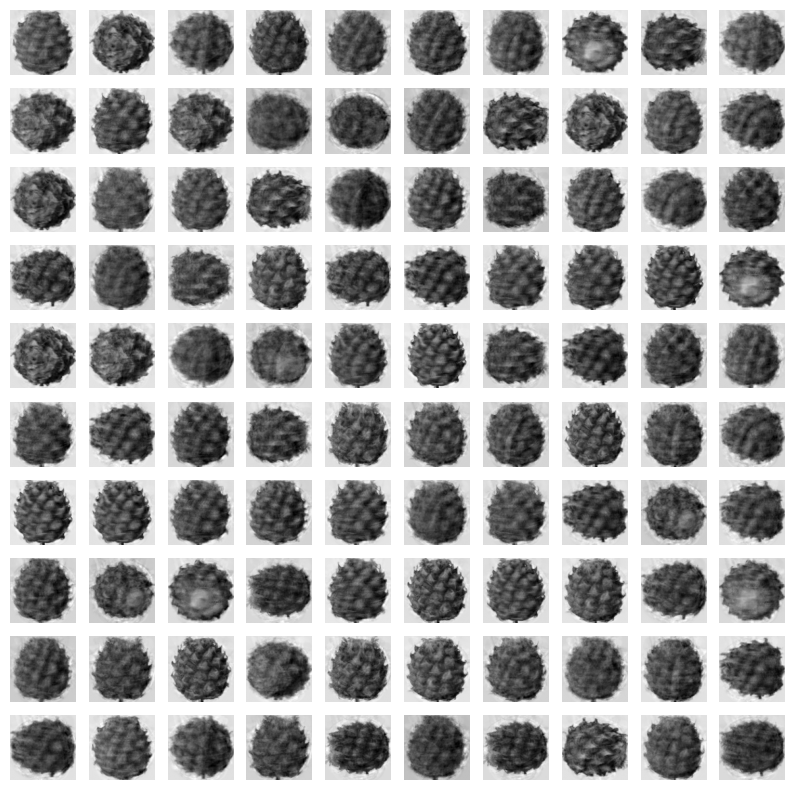

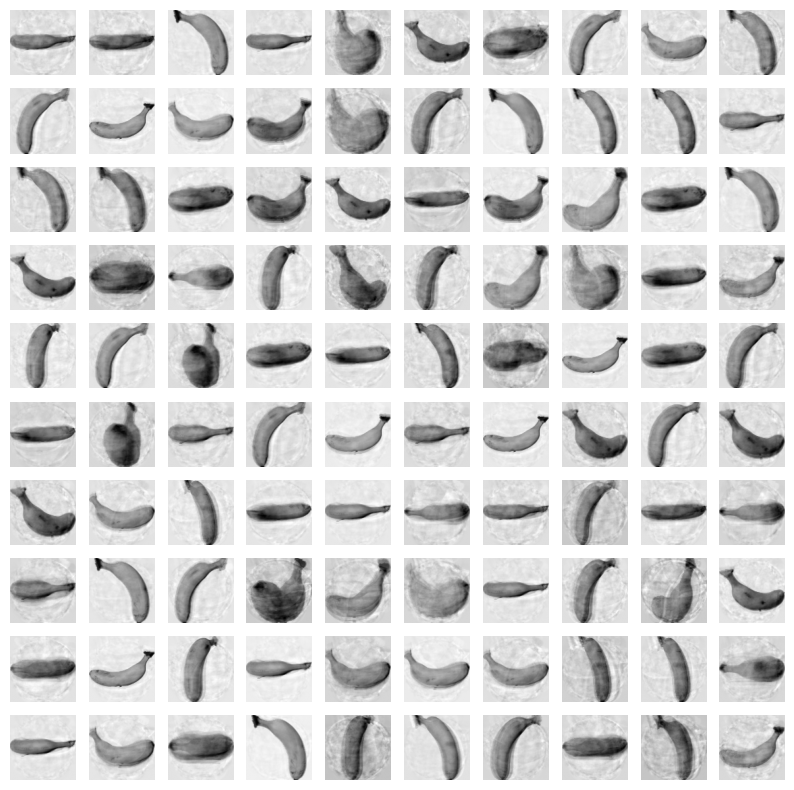

In [44]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [45]:
#🧁설명된 분산 p42
#각 주성분의 설명된 분산 비율이 기록

print(np.sum(pca.explained_variance_ratio_))

0.9214881146446615


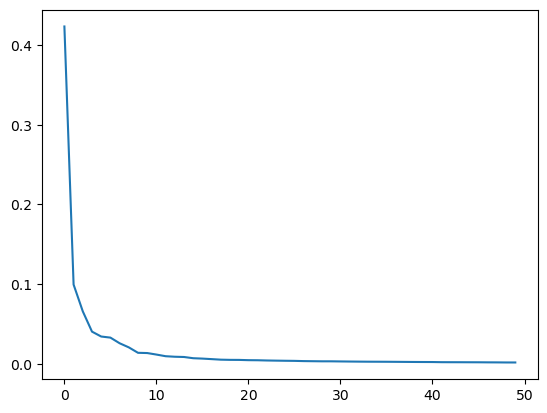

In [46]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

#그래프 10개 주성분이 대부분 분산을 표현

In [47]:
# 다른 알고리즘과 함께 사용
#--원본 데이터와 PCA 축소한 데이터를 지도 학습에 적용
## 먼저 로지스틱 회귀 모델 만들기

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [48]:
# 사과=0, 파인애플=1, 바나나=2
# 파이썬 리스트와 정수를 곱하면 리스트 안 원소를 정수만큼 반복

target = np.array([0]*100 + [1]*100 + [2]*100)

In [49]:
# 원본데이터 fruits_2d

from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))


0.9966666666666667
0.15232343673706056


In [50]:
# PCA 축소데이터 fruits_pca

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.010039520263671876


pca 50개 특성만 사용했는데도, 정확도 동일, 훈련 시간은 감소!

In [51]:
#지정된 비율에 도달할 때까지 자동으로 주성분 찾기
#--설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델 만들기

pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [52]:
print(pca.n_components_)

# 2개의 특성만으로 분산의 50% 표현 가능

2


In [53]:
# 원본데이터 변환, 주성분 2개, 변환된 데이터 크기는 (300,2)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [54]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.018299102783203125


/home/kooyoonjung/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kooyoonjung/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-

In [55]:
# 차원 축소 데이터 k-평균 알고리즘 클러스터

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


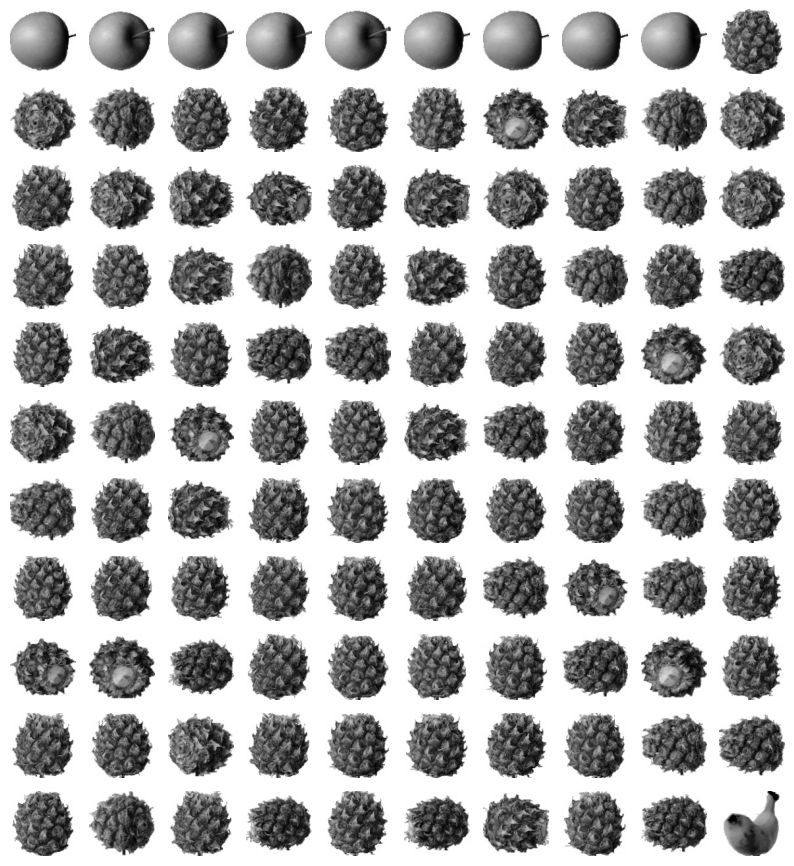

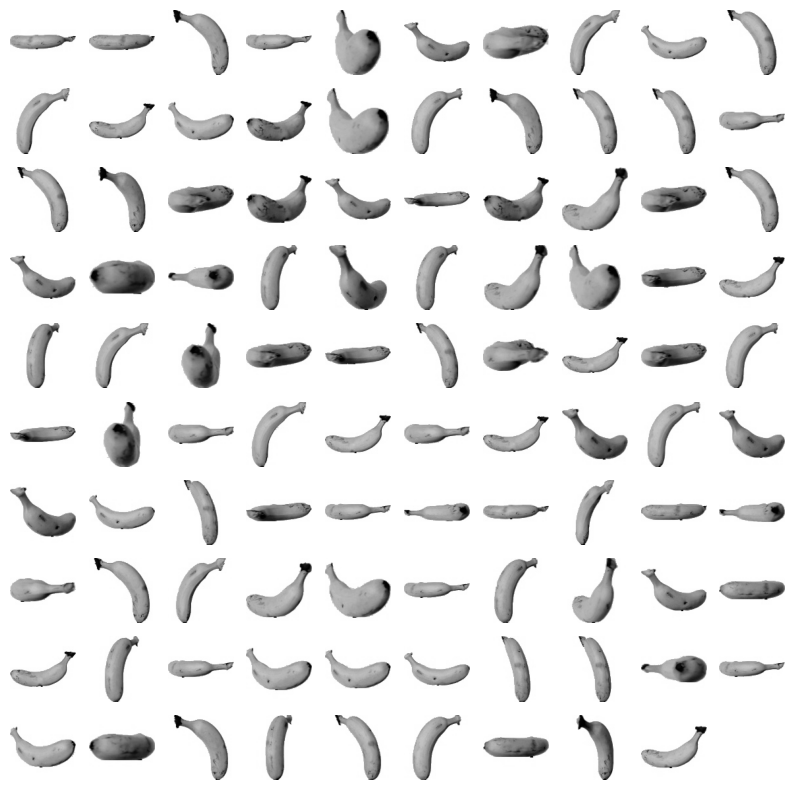

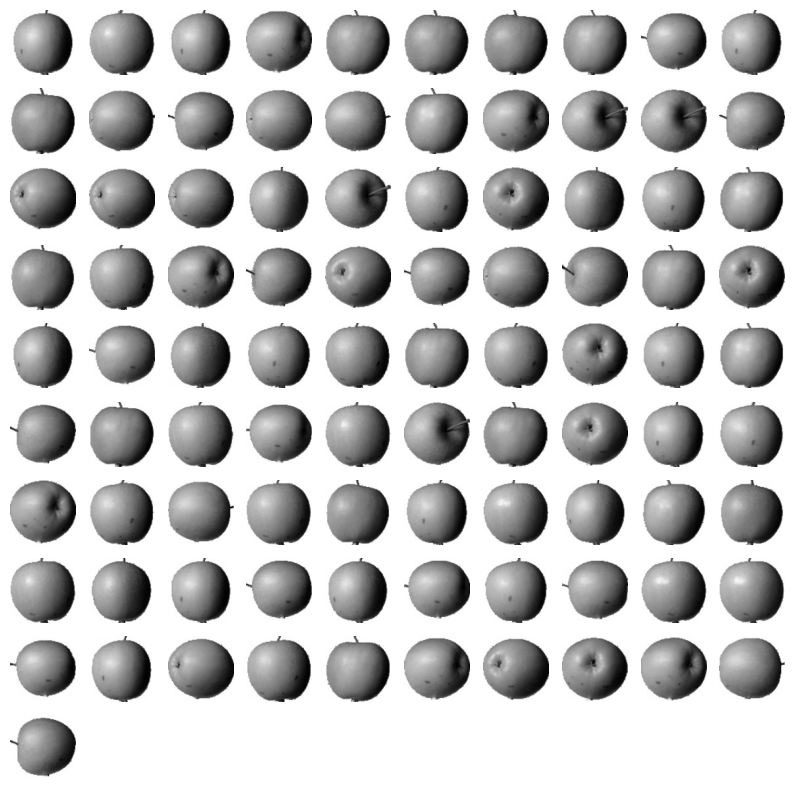

In [56]:
# KMeans가 찾은 레이블 사용하여 과일 이미지 출력

for label in range(0,3):
    draw_fruits(fruits[km.labels_==label])
    print("\n")

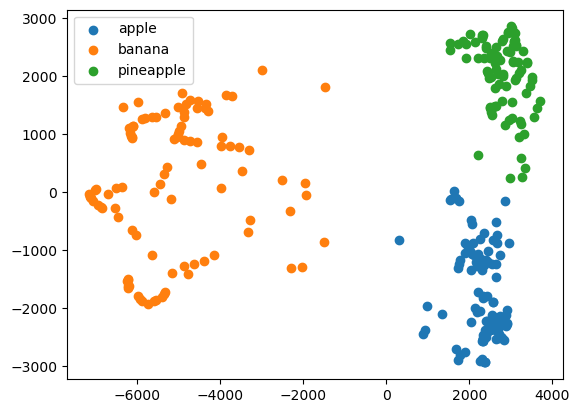

In [57]:
# km.labels_사용해 클러스터별로 나누어 산점도

for label in range(0, 3):
    data = fruits_pca[km.labels_==label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()